In [194]:
! mkdir "packages"

with open('packages/labeling.py', 'w') as file:
    file.write(
"""
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import json
import math

def get_detection(file_path,json_path):
    files = os.listdir(file_path)
    file_len = len(files)
    plt.figure(figsize=(14,12))

    for i in range(1,file_len+1):
        plt.subplot(math.ceil(file_len/2),2, i)
        image = mpimg.imread(file_path + "/" + files[i-1])
        with open(json_path + '/{}.json'.format(files[i-1][:5]), 'r+') as f:
            data = json.load(f)
            coor_1 = data['mark'][0]["coordinates"][0]
            coor_2 = data['mark'][0]["coordinates"][1]
            coor_3 = data['mark'][0]["coordinates"][2]
            coor_4 = data['mark'][0]["coordinates"][3]

        plt.imshow(image)
        plt.vlines(coor_1[0], coor_1[1], coor_4[1], color='r')
        plt.vlines(coor_2[0], coor_1[1], coor_3[1], color='r')
        plt.hlines(coor_4[1], coor_4[0], coor_3[0], color='r')
        plt.hlines(coor_2[1], coor_1[0], coor_3[0], color='r')

    plt.tight_layout()    
    plt.show() 
""")
    file.close()

mkdir: packages: File exists


In [204]:
with open('packages/labeling1.py', 'w') as file:
    file.write(
"""
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import json
import math

def get_detection(file_path,json_path):
    files = os.listdir(file_path)
    file_len = len(files)
    plt.figure(figsize=(14,12))

    for file in files:
        plt.subplot(math.ceil(file_len/2),2, files.index(file)+1)
        image = mpimg.imread(file_path + "/" + file)
        with open(json_path + '/{}.json'.format(file[:5]), 'r+') as f:
            data = json.load(f)
            coor_1 = data['mark'][0]["coordinates"][0]
            coor_2 = data['mark'][0]["coordinates"][1]
            coor_3 = data['mark'][0]["coordinates"][2]
            coor_4 = data['mark'][0]["coordinates"][3]

        plt.imshow(image)
        plt.vlines(coor_1[0], coor_1[1], coor_4[1], color='r')
        plt.vlines(coor_2[0], coor_1[1], coor_3[1], color='r')
        plt.hlines(coor_4[1], coor_4[0], coor_3[0], color='r')
        plt.hlines(coor_2[1], coor_1[0], coor_3[0], color='r')

    plt.tight_layout()    
    plt.show() 
""")
    file.close()

## img, json file path list 생성

### img file path

In [167]:
# indoor
in_file_path = ["./data/Multi-view_tracking_indoor/" + x + "/frames" for x in os.listdir("./data/Multi-view_tracking_indoor")]
in_file_path.remove('./data/Multi-view_tracking_indoor/.DS_Store/frames') # 이상한 경로 하나 삭제
# outdoor
out_file_path = ["./data/Multi-view_tracking_outdoor/" + x + "/frames" for x in os.listdir("./data/Multi-view_tracking_outdoor")]
out_file_path.remove('./data/Multi-view_tracking_outdoor/.DS_Store/frames')
# sum
file_path = in_file_path + out_file_path

In [168]:
file_pathes = [] # 최종 01,02 등등 파일마다의 path, get_detection의 첫 번째 argument

for path in file_path:
    length = len(os.listdir(path))
    for i in range(1,length+1):
        file_pathes.append(path + "/0{}".format(i))

### json file path

In [169]:
# indoor
in_json_path = ["./data/Multi-view_tracking_indoor/" + x + "/json/1-5" for x in os.listdir("./data/Multi-view_tracking_indoor")]
in_json_path.remove('./data/Multi-view_tracking_indoor/.DS_Store/json/1-5')

# outdoor
out_json_path = ["./data/Multi-view_tracking_outdoor/" + x + "/json/1-5" for x in os.listdir("./data/Multi-view_tracking_outdoor")]
out_json_path.remove('./data/Multi-view_tracking_outdoor/.DS_Store/json/1-5')
# sum
json_path = in_json_path + out_json_path

In [170]:
json_pathes = [] # 최종 01,02 등등 파일마다의 path, get_detection의 두 번째 argument

for path in json_path:
    length = len(os.listdir(path))
    for i in range(1,length+1):
        json_pathes.append(path + "/0{}".format(i))

## 위치 라벨링 되는지 봅시다

In [209]:
from packages import labeling1

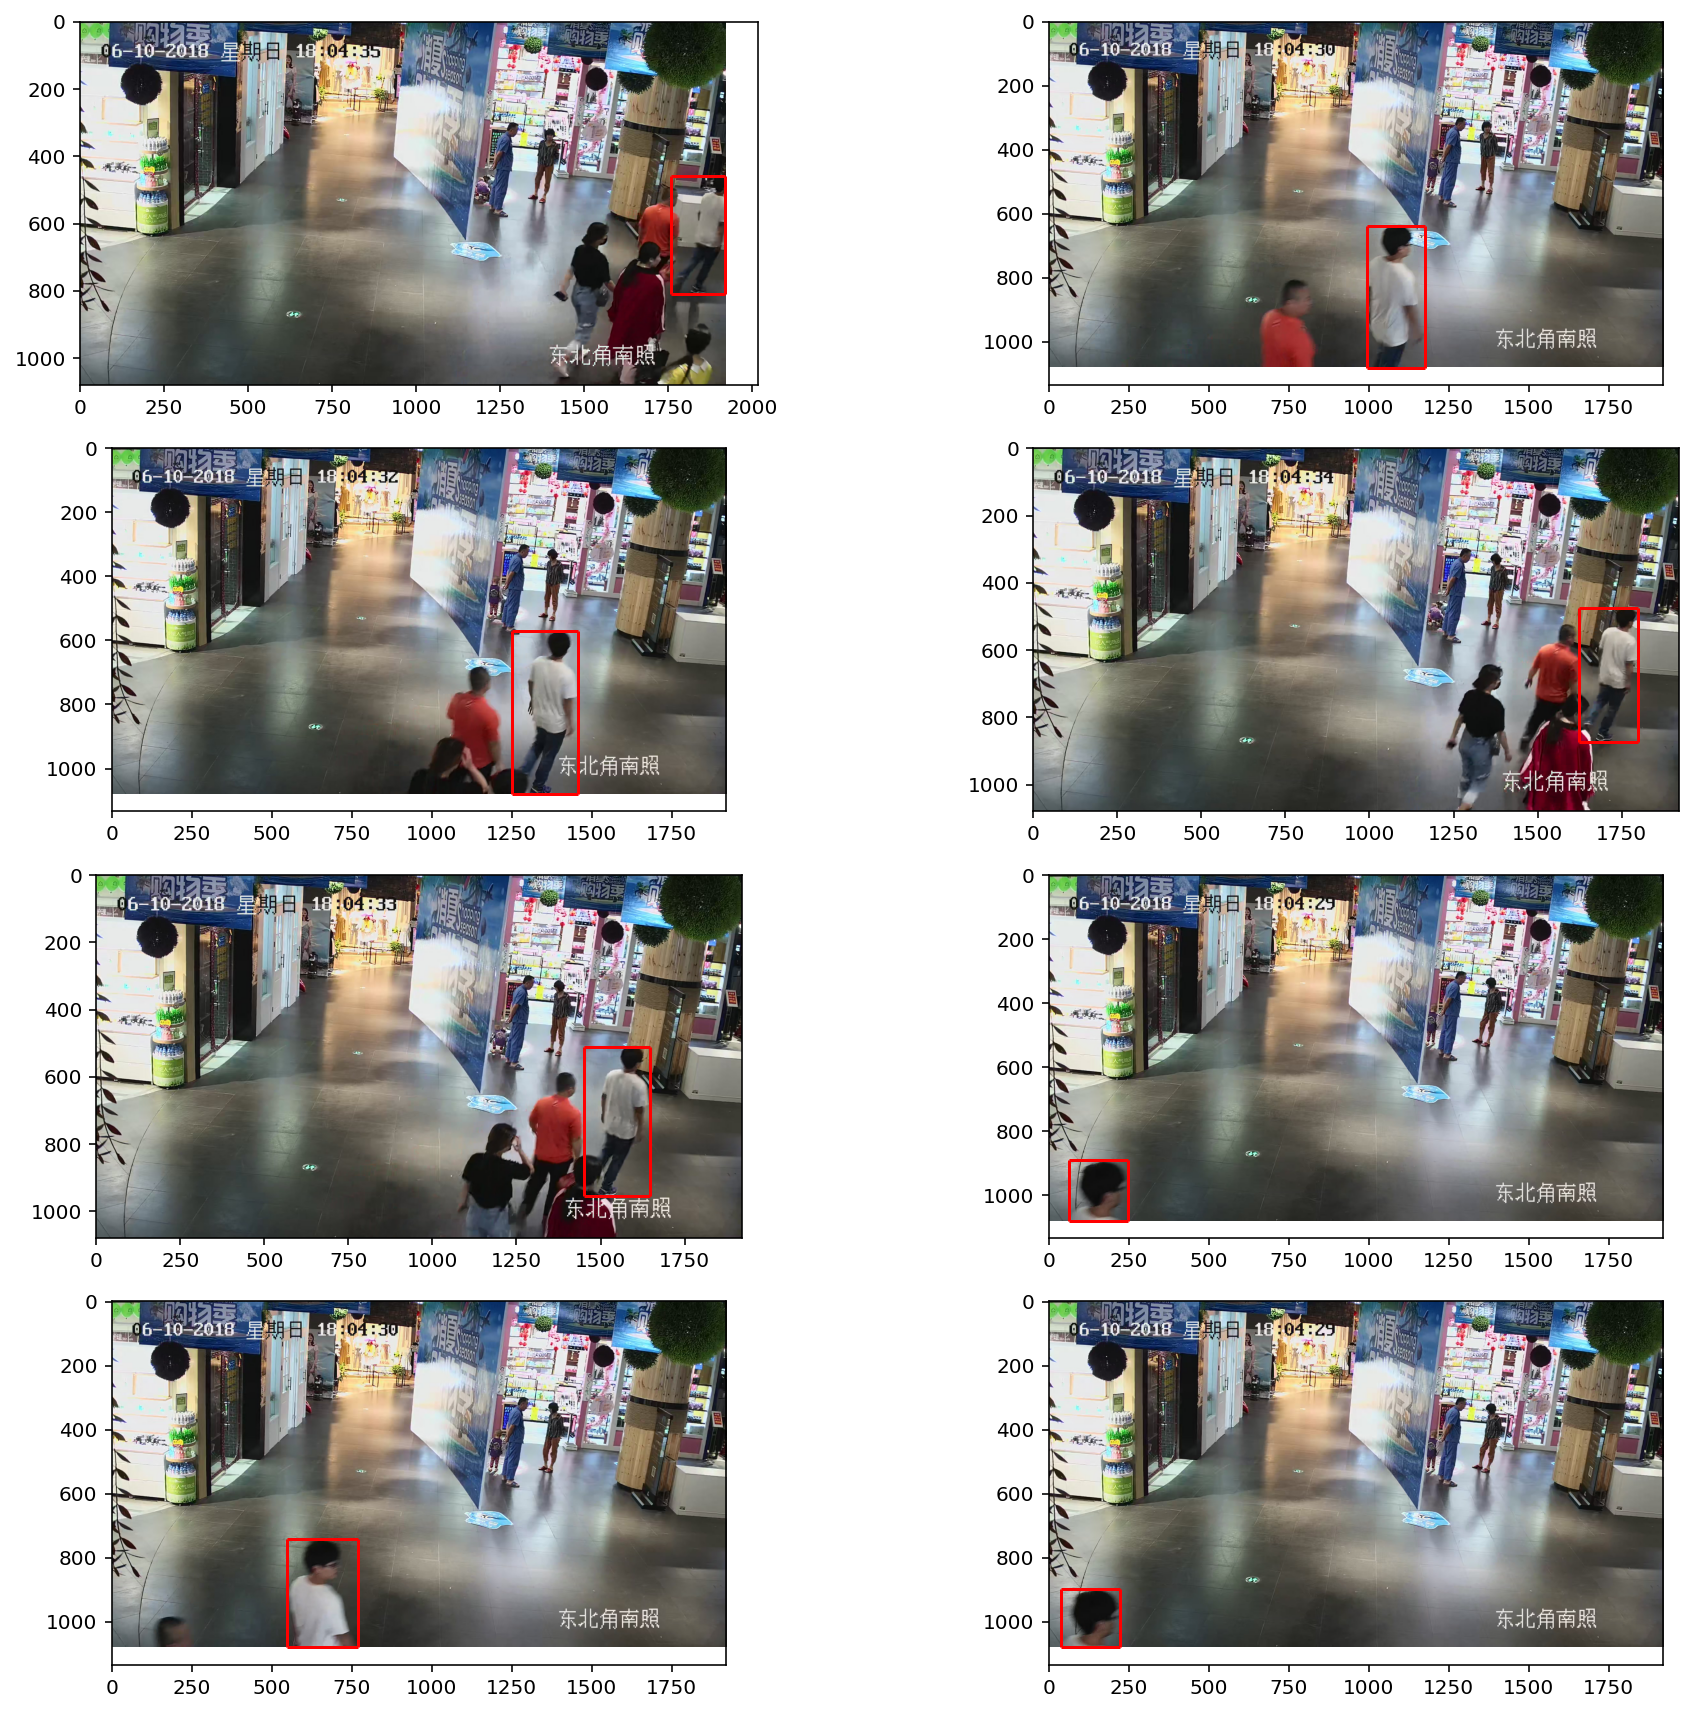

In [214]:
labeling1.get_detection(file_pathes[1], json_pathes[1])

## 딥파이 사용가능하게 xml 변환

In [3]:
import os

In [4]:
os.chdir(pwd)

In [5]:
import os
import glob

# indoor
in_json_path = ["./data/Multi-view_tracking_indoor/" + x + "/json/1-5" for x in os.listdir("./data/Multi-view_tracking_indoor")]
try:
    in_json_path.remove('./data/Multi-view_tracking_indoor/.DS_Store/json/1-5')
except:
    pass

# outdoor
out_json_path = ["./data/Multi-view_tracking_outdoor/" + x + "/json/1-5" for x in os.listdir("./data/Multi-view_tracking_outdoor")]
try:
    out_json_path.remove('./data/Multi-view_tracking_outdoor/.DS_Store/json/1-5')
except:
    pass
# sum
json_path = in_json_path + out_json_path

json_pathes = [] # 최종 01,02 등등 파일마다의 path, get_detection의 두 번째 argument

for path in json_path:
    length = len(os.listdir(path))
    for i in range(1,length+1):
        json_pathes.append(path + "/0{}".format(i))

In [6]:
files = sorted(glob.glob(json_pathes[0]+"/*"))
with open(files[0]) as f:
    data = json.load(f)

In [9]:
datas = []
json_coordinates_df = pd.DataFrame()        
        
for each in json_pathes:
    files = sorted(glob.glob(each+"/*"))
    for file in files:
        with open(file) as f:
            data = json.load(f)
            co_ls = data['mark'][0]['coordinates']
            x_min = min([each[0] for each in co_ls])
            x_max = max([each[0] for each in co_ls])
            y_min = min([each[1] for each in co_ls])
            y_max = max([each[1] for each in co_ls])
            upper_folder = file.split('/')[3]
            lower_folder = file.split('/')[6]
            file_name = file.split('/')[7]
            file_name_whole = file.split('/')[3]+file.split('/')[6]+file.split('/')[7]
            label = data['mark'][0]['label']
            truncated_str = label['Truncated']
            occluded_str = label['Occluded']
            category = label['Category']
            
        data = ({'category':category,'upper_folder': upper_folder, 'lower_folder': lower_folder, 'file_name': file_name, 'file_name_whole': file_name_whole, 'label':label, 'truncated_str':truncated_str, 'occluded_str':occluded_str, 'x_min': x_min, 'x_max': x_max, 'y_min': y_min, 'y_max': y_max})
        datas.append(data)
json_coordinates_df= pd.DataFrame(datas)

In [10]:
json_coordinates_df

,category,upper_folder,lower_folder,file_name,file_name_whole,label,truncated_str,occluded_str,x_min,x_max,y_min,y_max
0,pedestrian,10541_market,01,00003.json,10541_market0100003.json,"{'Category': 'pedestrian', 'Clear face': 'no',...",non truncated,largely occluded,830.4346,920.9346,298.5964,567.5964
1,pedestrian,10541_market,01,00004.json,10541_market0100004.json,"{'Category': 'pedestrian', 'Clear face': 'no',...",non truncated,non occluded,728.2982,844.2982,329.6708,603.6708
2,pedestrian,10541_market,01,00005.json,10541_market0100005.json,"{'Category': 'pedestrian', 'Clear face': 'no',...",non truncated,non occluded,641.5995,759.5995,370.2455,684.7455
3,pedestrian,10541_market,01,00006.json,10541_market0100006.json,"{'Category': 'pedestrian', 'Clear face': 'no',...",non truncated,non occluded,535.5062,671.5062,419.5561,775.5561
4,pedestrian,10541_market,01,00007.json,10541_market0100007.json,"{'Category': 'pedestrian', 'Clear face': 'no',...",non truncated,partly occluded,398.9814,550.5493,488.9876,875.5859
...,...,...,...,...,...,...,...,...,...,...,...,...
3425,pedestrian,31281_street,04,00005.json,31281_street0400005.json,"{'Category': 'pedestrian', 'Clear face': 'no',...",non truncated,non occluded,461.0000,688.0000,456.0000,849.0000
3426,pedestrian,31281_street,04,00006.json,31281_street0400006.json,"{'Category': 'pedestrian', 'Clear face': 'no',...",non truncated,non occluded,791.9095,1014.2536,404.9814,794.9182
3427,pedestrian,31281_street,04,00007.json,31281_street0400007.json,"{'Category': 'pedestrian', 'Clear face': 'no',...",non truncated,non occluded,1128.9659,1325.2697,371.0037,756.9343
3428,pedestrian,31281_street,04,00008.json,31281_street0400008.json,"{'Category': 'pedestrian', 'Clear face': 'no',...",non truncated,non occluded,1447.2282,1592.1191,348.1153,733.3782


In [86]:
json_coordinates_df.to_csv('json_coordinates_df_updated.csv', index=False)

In [87]:
xml_csv = pd.read_csv("./json_coordinates_df_updated.csv")

In [88]:
xml_csv.head()

,upper_folder,lower_folder,file_name,file_name_whole,x_min,x_max,y_min,y_max
0,10541_market,1,00003.json,10541_market0100003.json,830.4346,920.9346,298.5964,567.5964
1,10541_market,1,00004.json,10541_market0100004.json,728.2982,844.2982,329.6708,603.6708
2,10541_market,1,00005.json,10541_market0100005.json,641.5995,759.5995,370.2455,684.7455
3,10541_market,1,00006.json,10541_market0100006.json,535.5062,671.5062,419.5561,775.5561
4,10541_market,1,00007.json,10541_market0100007.json,398.9814,550.5493,488.9876,875.5859


In [95]:
import re

In [97]:
xml_csv.file_name_whole = xml_csv.file_name_whole.apply(lambda x: re.sub('.json','', x))

In [98]:
xml_csv.head()

,upper_folder,lower_folder,file_name,file_name_whole,x_min,x_max,y_min,y_max,xml_text
0,10541_market,1,00003.json,10541_market0100003,830.4346,920.9346,298.5964,567.5964,<labels>\n <object>\n <name>10541_ma...
1,10541_market,1,00004.json,10541_market0100004,728.2982,844.2982,329.6708,603.6708,<labels>\n <object>\n <name>10541_ma...
2,10541_market,1,00005.json,10541_market0100005,641.5995,759.5995,370.2455,684.7455,<labels>\n <object>\n <name>10541_ma...
3,10541_market,1,00006.json,10541_market0100006,535.5062,671.5062,419.5561,775.5561,<labels>\n <object>\n <name>10541_ma...
4,10541_market,1,00007.json,10541_market0100007,398.9814,550.5493,488.9876,875.5859,<labels>\n <object>\n <name>10541_ma...


In [99]:
def get_xml(a,b,c,d,e) :
    xml_text = '''<labels>
    <object>
        <name>{0}</name>
        <bndbox>
            <xmin>{1}</xmin>
            <ymin>{2}</ymin>
            <xmax>{3}</xmax>
            <ymax>{4}</ymax>
        </bndbox>
    </object>
'''.format(a,b,c,d,e)
    return xml_text

In [100]:
xml_csv["xml_text"] = ''

for idx in range(len(xml_csv)):
    xml_csv.loc[idx, "xml_text"] = get_xml(xml_csv.loc[idx,'file_name_whole'], xml_csv.loc[idx,'x_min'], xml_csv.loc[idx,'y_min'], xml_csv.loc[idx,'x_max'], xml_csv.loc[idx,'y_max'])

In [103]:
!mkdir ../Label

def save_xml(file_name,xml_text):
    with open('../Label/{}.xml'.format(file_name), 'w') as file:
        file.write(xml_text)
        file.close()

mkdir: ../Label: File exists


In [104]:
for row in xml_csv.itertuples():
    save_xml(row.file_name_whole, row.xml_text)

## 계획변경: YOLOv3 custom label로 변환
- convert json to txt for yolov3 custom labeling

In [ ]:
# first get width and height of frame
# then get the coordinates and convert them to x,y,w,h

In [20]:
def convert(size, box):
    dw = 1./size[0]
    dh = 1./size[1]
    x = (box[0] + box[1])/2.0
    y = (box[2] + box[3])/2.0
    w = box[1] - box[0]
    h = box[3] - box[2]
    x = x*dw
    w = w*dw
    y = y*dh
    h = h*dh
    return (x,y,w,h)

In [42]:
from PIL import Image

In [48]:
# 나만 그런가 이 jpg 파일은 0바이트라고 뜨네...
json_coordinates_df[json_coordinates_df['file_name_whole'] == '10539_market0200005']

,category,upper_folder,lower_folder,file_name,file_name_whole,label,truncated_str,occluded_str,x_min,x_max,y_min,y_max
2303,pedestrian,10539_market,02,00005.json,10539_market0200005,"{'Category': 'pedestrian', 'Clear face': 'no',...",partly truncated,non occluded,1226.0,1426.0,644.0,1080.0


In [50]:
json_coordinates_df.drop(2303, axis=0, inplace=True)
json_coordinates_df.reset_index(drop=True, inplace=True)

In [51]:
# class and x, y, width, height
coordinates_df = None
datas = []
for idx in range(len(json_coordinates_df)):
    file_name = json_coordinates_df.loc[idx]['file_name_whole']
    category = json_coordinates_df.loc[idx]['category']
    xmin = json_coordinates_df.loc[idx]['x_min']
    xmax = json_coordinates_df.loc[idx]['x_max']
    ymin = json_coordinates_df.loc[idx]['y_min']
    ymax = json_coordinates_df.loc[idx]['y_max']

    # class
    if category == 'pedestrian':
        c = 0
    elif category == 'rider':
        c = 1
    
    # width and height for conversion
    im=Image.open("./Dataset/{}.jpg".format(file_name))
    w= int(im.size[0])
    h= int(im.size[1])
    # x, y, w, h for txt file
    b = (xmin, xmax, ymin, ymax)
    x,y,w,h = convert((w,h), b)
    
    data = ({'title': file_name, 'c': c, 'x': x, 'y': y, 'w': w, 'h': h})
    datas.append(data)
coordinates_df= pd.DataFrame(datas)    

In [54]:
coordinates_df.loc(0)

,title,c,x,y,w,h
0,10541_market0100003,0,0.456086,0.401015,0.047135,0.249074
1,10541_market0100004,0,0.409530,0.432103,0.060417,0.253704
2,10541_market0100005,0,0.364896,0.488422,0.061458,0.291204
3,10541_market0100006,0,0.314326,0.553293,0.070833,0.329630
4,10541_market0100007,0,0.247274,0.631747,0.078942,0.357961
...,...,...,...,...,...,...
3424,31281_street0400005,0,0.299219,0.604167,0.118229,0.363889
3425,31281_street0400006,0,0.470355,0.555509,0.115804,0.361053
3426,31281_street0400007,0,0.639124,0.522194,0.102242,0.357343
3427,31281_street0400008,0,0.791497,0.500691,0.075464,0.356725


In [53]:
coordinates_df['c'].value_counts()

0    2571
1     858
Name: c, dtype: int64

In [63]:
!mkdir text_label

In [69]:
# write text file
os.chdir(pwd + '/text_label')

save_path = pwd+'/text_label'
for idx in range(len(coordinates_df)):
    test = coordinates_df.loc[idx]
    completeName = os.path.join(save_path, test['title']+".txt") 
    f = open(test['title']+".txt","w")
    f.write("{} {} {} {} {}".format(test.c, test.x, test.y, test.w, test.h))
    f.close()

## jpg 파일명 변환 후 한 폴더로 옮겨주기

In [123]:
import os
import glob

pwd_ = pwd
os.chdir(pwd_)
# indoor
in_frames_path = ["./data/Multi-view_tracking_indoor/" + x + "/frames/" for x in os.listdir("./data/Multi-view_tracking_indoor")]
try:
    in_frames_path.remove('./data/Multi-view_tracking_indoor/.DS_Store/frames/')
except:
    pass

# outdoor
out_frames_path = ["./data/Multi-view_tracking_outdoor/" + x + "/frames/" for x in os.listdir("./data/Multi-view_tracking_outdoor")]
try:
    out_frames_path.remove('./data/Multi-view_tracking_outdoor/.DS_Store/frames/')
except:
    pass
# sum
frames_path = in_frames_path + out_frames_path

frames_pathes = [] # 최종 01,02 등등 파일마다의 path, get_detection의 두 번째 argument

for path in frames_path:
    try:
        os.listdir(path).remove('.DS_Store')
    except:
        pass
    length = len(os.listdir(path))
    for i in range(1,length+1):
        frames_pathes.append(path + "0{}".format(i))

# 파일명 변경
for each in frames_pathes:
    try:
    os.chdir(pwd_+each[1:])
    except:
        continue
    for oldfile in glob.glob("*.jpg"):
        newfile = (each.split('/')[3]+each.split('/')[5]+oldfile)
        os.rename(oldfile, newfile)

In [ ]:
# 파일 하나의 디렉토리로 통일
import shutil

for each in frames_pathes:
    try:
        os.chdir(pwd_+each[1:])
    except:
        continue
    for file in glob.glob("*.jpg"):
        shutil.move(pwd_+each[1:]+'/'+file, '{}/data/frames/{}'.format(pwd_,file))

In [44]:
# 들어간 파일 갯수 확인
len(os.listdir(path))

3430

In [46]:
# 혹여 불필요한 파일이 디렉토리에 들어갔는지 확인 
path = pwd_ + '/data/frames'
os.listdir(path).index('.DS_Store')

ValueError: '.DS_Store' is not in list